# Project 4

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as plt_dt

In [2]:
co2 = np.genfromtxt('Carbon Dioxide.txt', skip_header=53, usecols=(2,3,4)).T
print(co2.shape)

(3, 757)


Predicted 2030: 434.1149268621557


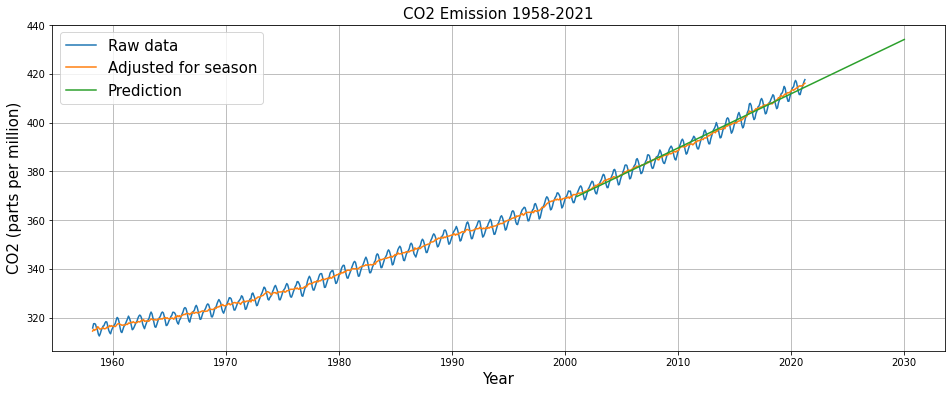

In [3]:
plt.figure(figsize=(16,6))
fontsize = 15
# Plot each of the three data arrays
plt.plot(co2[0],co2[1],label='Raw data')
plt.plot(co2[0],co2[2],label='Adjusted for season')

index_start = 0
for i, year in enumerate(co2[0]):
    if int(year)==2001:
        index_start = i
        break
m, c = np.polyfit(co2[0][index_start:],co2[2][index_start:],1)
plt.plot([co2[0][index_start],2030],[co2[0][index_start]*m+c,2030*m+c], label='Prediction')
print('Predicted 2030:', 2030*m+c)

plt.xlabel(r"Year",fontsize=fontsize)
plt.ylabel(r"CO2 (parts per million)",fontsize=fontsize)
plt.title("CO2 Emission 1958-2021", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()

In [4]:
global_temperature = np.genfromtxt('Global Temperature.txt', skip_header=5).T
print(global_temperature.shape)

(3, 141)


Predicted 2030: 1.2015714285714338


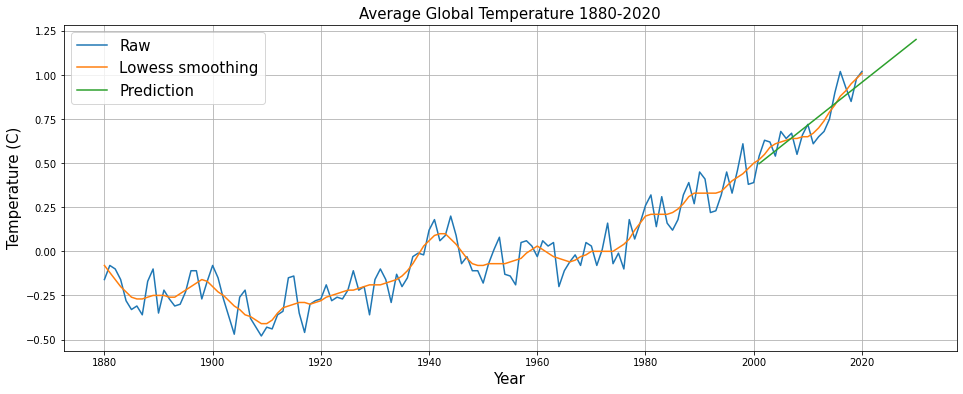

In [5]:
plt.figure(figsize=(16,6))
fontsize = 15
# Plot each of the three data arrays
plt.plot(global_temperature[0],global_temperature[1],label='Raw')
plt.plot(global_temperature[0],global_temperature[2],label='Lowess smoothing')

index_start = 0
for i, year in enumerate(global_temperature[0]):
    if int(year)>=2001:
        index_start = i
        break

m, c = np.polyfit(global_temperature[0][index_start:],global_temperature[2][index_start:],1)
plt.plot([global_temperature[0][index_start],2030],[global_temperature[0][index_start]*m+c,2030*m+c],label='Prediction')
print('Predicted 2030:', 2030*m+c)

plt.xlabel(r"Year",fontsize=fontsize)
plt.ylabel(r"Temperature (C)",fontsize=fontsize)
plt.title("Average Global Temperature 1880-2020", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()

In [6]:
arctic_ice_min = np.genfromtxt('Arctic Sea Ice Minimum.csv', skip_header=1, delimiter=',', usecols=(0,-2,-1)).T
print(arctic_ice_min.shape)

(3, 42)


Predicted 2030: 3.1093984962406296


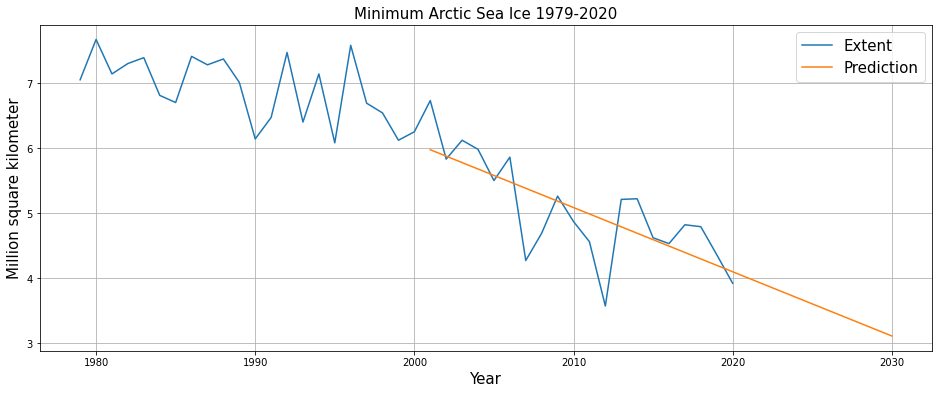

In [7]:
plt.figure(figsize=(16,6))
fontsize = 15

plt.plot(arctic_ice_min[0],arctic_ice_min[1],label='Extent')
#plt.plot(arctic_ice_min[0],arctic_ice_min[2],label='Area')

index_start = 0
for i, year in enumerate(arctic_ice_min[0]):
    if int(year)>=2001:
        index_start = i
        break

m, c = np.polyfit(arctic_ice_min[0][index_start:],arctic_ice_min[1][index_start:],1)

plt.plot([arctic_ice_min[0][index_start],2030],[arctic_ice_min[0][index_start]*m+c,2030*m+c],label='Prediction')
print('Predicted 2030:', 2030*m+c)

plt.xlabel(r"Year",fontsize=fontsize)
plt.ylabel(r"Million square kilometer",fontsize=fontsize)
plt.title("Minimum Arctic Sea Ice 1979-2020", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points
lowess = sm.nonparametric.lowess


Predicted 2030: 3.1093984962406296


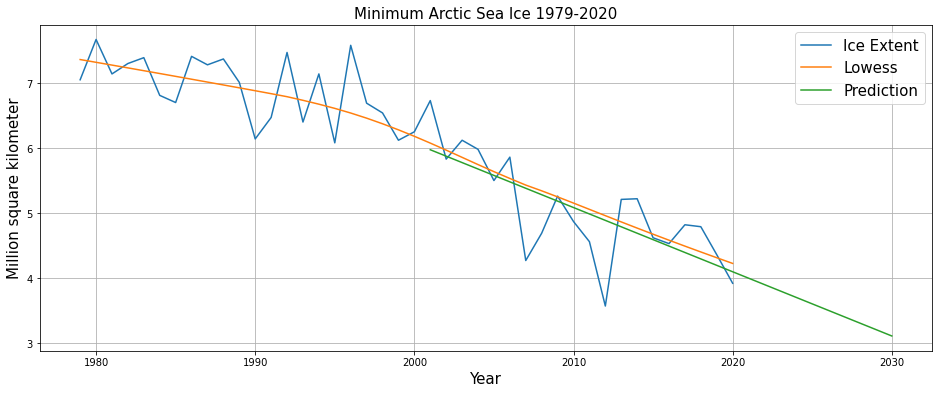

In [9]:
plt.figure(figsize=(16,6))
fontsize = 15

plt.plot(arctic_ice_min[0],arctic_ice_min[1],label='Ice Extent')
#plt.plot(arctic_ice_min[0],arctic_ice_min[2],label='Area')

lowe = lowess(arctic_ice_min[1],arctic_ice_min[0]).T
plt.plot(lowe[0],lowe[1], label='Lowess')

index_start = 0
for i, year in enumerate(arctic_ice_min[0]):
    if int(year)>=2001:
        index_start = i
        break

m, c = np.polyfit(arctic_ice_min[0][index_start:],arctic_ice_min[1][index_start:],1)

plt.plot([arctic_ice_min[0][index_start],2030],[arctic_ice_min[0][index_start]*m+c,2030*m+c],label='Prediction')
print('Predicted 2030:', 2030*m+c)

plt.xlabel(r"Year",fontsize=fontsize)
plt.ylabel(r"Million square kilometer",fontsize=fontsize)
plt.title("Minimum Arctic Sea Ice 1979-2020", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()

In [10]:
arctic_ice_mass = np.genfromtxt('Ice Sheets.txt', skip_header=31).T
print(arctic_ice_mass.shape)

(3, 194)


Predicted 2030: -4112.34385944606


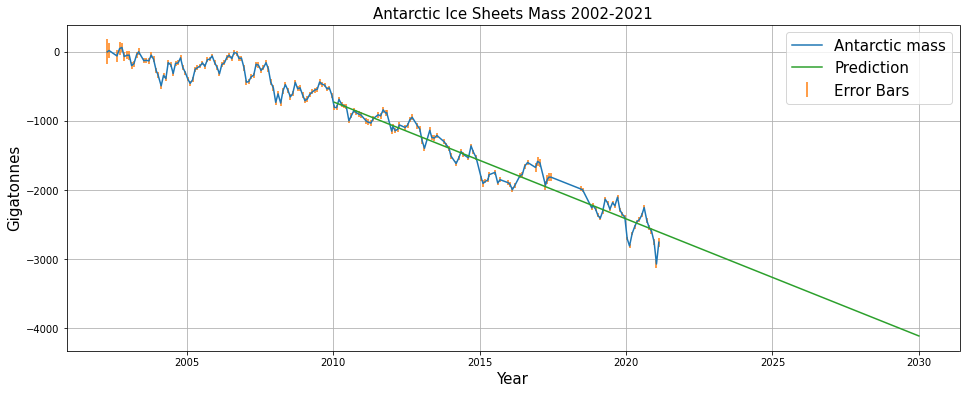

In [11]:
plt.figure(figsize=(16,6))
fontsize = 15

plt.plot(arctic_ice_mass[0],arctic_ice_mass[1],label='Antarctic mass')
plt.errorbar(arctic_ice_mass[0],arctic_ice_mass[1], yerr=[arctic_ice_mass[2],arctic_ice_mass[2]], fmt=' ', label='Error Bars')

index_start = 0
for i, year in enumerate(arctic_ice_mass[0]):
    if int(year)>=2010:
        index_start = i
        break

m, c = np.polyfit(arctic_ice_mass[0][index_start:],arctic_ice_mass[1][index_start:],1)

plt.plot([arctic_ice_mass[0][index_start],2030],[arctic_ice_mass[0][index_start]*m+c,2030*m+c],label='Prediction')
print('Predicted 2030:', 2030*m+c)

plt.xlabel(r"Year",fontsize=fontsize)
plt.ylabel(r"Gigatonnes",fontsize=fontsize)
plt.title("Antarctic Ice Sheets Mass 2002-2021", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()

In [12]:
mean_sea_level = np.genfromtxt('Global Mean Sea Level.txt', skip_header=48, usecols=(2, 5)).T
print(mean_sea_level.shape)

(2, 1026)


Predicted 2030: 95.17822655442251


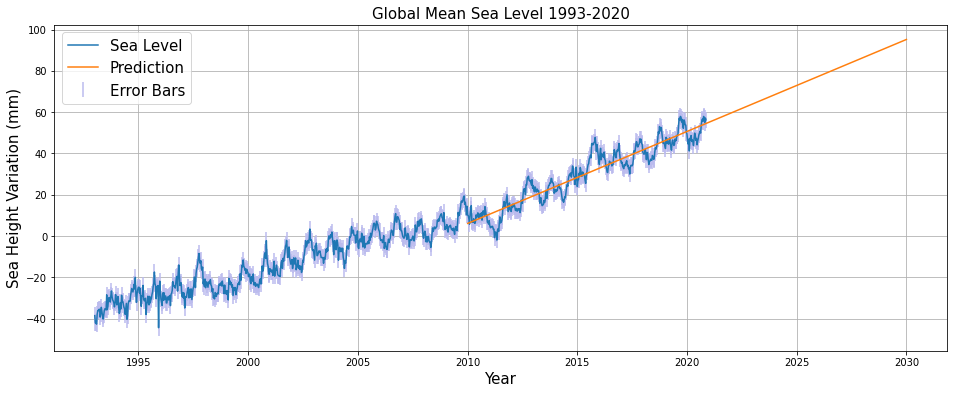

In [13]:
plt.figure(figsize=(16,6))
fontsize = 15

plt.plot(mean_sea_level[0],mean_sea_level[1],label='Sea Level')
plt.errorbar(mean_sea_level[0],mean_sea_level[1], yerr=4, fmt=' ', color='#bbbbee', label='Error Bars')

index_start = 0
for i, year in enumerate(mean_sea_level[0]):
    if int(year)>=2010:
        index_start = i
        break

m, c = np.polyfit(mean_sea_level[0][index_start:],mean_sea_level[1][index_start:],1)

plt.plot([mean_sea_level[0][index_start],2030],[mean_sea_level[0][index_start]*m+c,2030*m+c],label='Prediction')
print('Predicted 2030:', 2030*m+c)

plt.xlabel(r"Year",fontsize=fontsize)
plt.ylabel(r"Sea Height Variation (mm)",fontsize=fontsize)
plt.title("Global Mean Sea Level 1993-2020", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()